In [ ]:
## 01-1 인공지능과 머신러닝, 딥러닝

#인공지능: 학습하고 추론할 수 있는 지능을 가진 기술
#머신러닝: 일일이 프로그래밍X, 자동으로 데이터에서 규칙을 학습하는 알고리즘 (통계학) ex.라이브러리; 사이킷런
#딥러닝: 머신러닝 알고리즘 중 인공신경망(RNN)을 기반으로 한 통칭 ex.라이브러리; 텐서플로,파이토치

In [ ]:
## 01-2 코랩과 주피터 노트북

#웹 브라우저에서 무료로 파이썬테스트, 머신러닝 프로그램
#구글 계정이 있다면 바로 코랩 （https：//colab.research.google.com）

#코랩: 웹 브라우저 기반의 파이썬 코드 실행 환경
#노트북: 코랩의 프로그램 작성 단위, 대화식 프로그램을 만들 수 있음
#구글드라이브: 클라우드 파일 저장 서비스, 'Colab Notebooks'폴더
#--https://colab.research.google.com/


#코랩은 구글이 대화식 프로그래밍 환경인 주피터를 커스터마이징한 것
#코랩 노트북은 구글 클라우드의 가상 서버 Virtual Machine를 사용
#이 노트북은 구글 클라우드의 컴퓨트 엔진impute Engine에 연결되어 있습니다.
#이 서버의 메모리는 약 12기가이고 디스크 공간은 약 225기가이다.

## 제한사항
#--코랩 노트북으로 동시에 사용할 수 있는 구글 클라우드의 가상 서버는 최대 5개
#--또한 1 개의 노트북을 12시간 이상 실행할 수 없음



In [ ]:
## 01-3 마켓과 머신러닝
#k-최근접 이웃 알고리즘


#p48 분류(classification); 머신러닝에서 여러 개의 종류(or class)중 하나를 구별해 내는 문제
#2개의 클래스 중 하나를 고르는 문제를 binary classification (파이썬 내 클래스와 다름!!)


#특성
#산점도; x와 y축 에서 점으로 표시한 그래프
#맷플롯립; 파이썬에서 과학계산용 그래프를 그리는 대표적인 패키지
#--이 패키지를 import하고 산점도를 그리는 scatter()함수사용


In [1]:
#p50

#먼저, 데이터 변수 선
bream_length = [25.4, 26.3, 26.5, 29.0, 29.7, 29.7,
                30.0, 30.0, 30.7, 31.0, 31.0, 31.5,
                32.0, 32.0, 32.0, 33.0, 33.0, 33.5,
                33.5, 34.0, 34.0, 34.5, 35.0, 35.0,
                35.0, 36.0, 36.0, 37.0, 38.5, 38.5,
                38.5, 40.0, 40.0, 40.0, 42.0, 43.0]

bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0,
                500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 525.0, 500.0, 550.0, 565.0, 620.0,
                680.0, 700.0, 725.0, 720.0, 714.0, 850.0,
                1000.0, 920.0, 955.0, 925.0, 975.0, 950.0,
                940.0, 955.0, 980.0, 1000.0, 1100.0, 1000.0]


# #그래프 코드 실행
# import matplotlib.pyplot as plt #matplotlib의 pyplot 함수를 plt로 줄여서 사용

# plt.scatter(bream_length, bream_weight)
# plt.xlabel('lenght')
# plt.ylable('weight')
# plt.show()

#맷플롯립에서 2개의 산점도를 하나의 그래프로 그리는 것

smelt_length = [ 9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2,
12.4, 13.0, 14.3, 15.0]
smelt_weight = [ 6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4,
12.2, 19.7, 19.9]

# plt.scatter(bream_length, bream_weight)
# plt.scatter(smelt_length, smelt_weight)
# plt.xlable('length')
# plt.ylabel('weight')
# plt.show()

## 목표 : k-최근접 이웃 알고리즘을 사용해 도미와 빙어 데이터 구분
# k-최근접 이웃 알고리즘 사용 전 도미와 빙어 데이터를 하나의 데이터로 합치기
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

#2차원 리스트, 리스트의 리스트를 사용해 length와 weight 합치기(생선 49개의 길이와 무게)
fish_data = [[l,w] for l, w in zip(length,weight)]
print(fish_data)

#정답데이터 만들어 주기(첫번째생선은 도미,두번째 생선은 생선도 도미...)
#왜? 규칙을 찾기 위한 정보 제공
#컴퓨터는 문자를 직접 이해 못함
#p55

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.7, 430.0], [29.7, 450.0], [30.0, 500.0], [30.0, 390.0], [30.7, 450.0], [31.0, 500.0], [31.0, 475.0], [31.5, 500.0], [32.0, 500.0], [32.0, 525.0], [32.0, 500.0], [33.0, 550.0], [33.0, 565.0], [33.5, 620.0], [33.5, 680.0], [34.0, 700.0], [34.0, 725.0], [34.5, 720.0], [35.0, 714.0], [35.0, 850.0], [35.0, 1000.0], [36.0, 920.0], [36.0, 955.0], [37.0, 925.0], [38.5, 975.0], [38.5, 950.0], [38.5, 940.0], [40.0, 955.0], [40.0, 980.0], [40.0, 1000.0], [42.0, 1100.0], [43.0, 1000.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


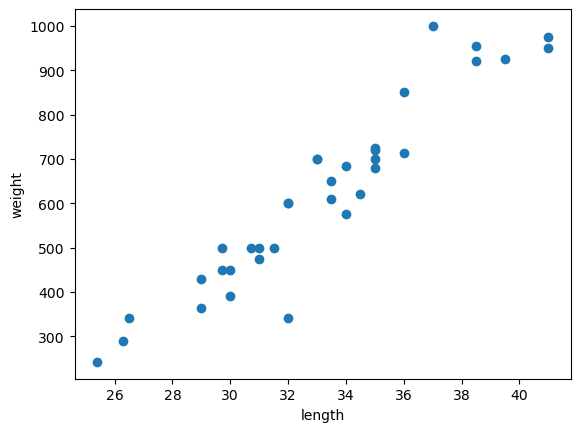

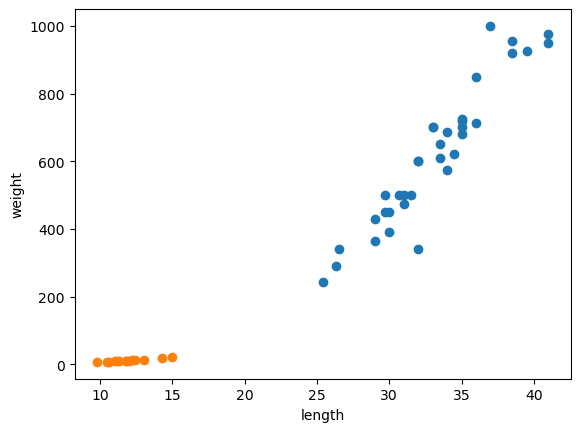

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [

In [2]:
##35마리의 도미 데이터
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7,
31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5,
34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0,
38.5, 38.5, 39.5, 41.0, 41.0]

bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0,
450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0,
700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0,
925.0, 975.0, 950.0]


import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


## 14마리의 빙어 데이터
smelt_length = [ 9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2,
12.4, 13.0, 14.3, 15.0]
smelt_weight = [ 6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4,
12.2, 19.7, 19.9]

## 도미 및 빙어 데이터 2개의 산점도 한 그래프
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


# k-최근접 이웃 알고리즘 사용하여 두 종류 생선의 데이터를 구분하기 전에
# 하나의 데이터로 합쳐 하나의 리스트로 만들어줌

length = bream_length + smelt_length
weight = bream_weight + smelt_weight

#머신러닝 패키지인 '사이킷런'을 사용하기 위해 리스트를 세로 방향으로 만들기
fish_data = [[I, w] for I, w in zip(length, weight)]

print(fish_data)

##***49마리의 생선 길이와 무게 준비 완료 후 정답 데이터 만들기
#***도미와 빙어를 구분하는 규칙을 찾는 능력을 갖게 하기 위해 초기 방향
#즉, 도미와 빙어를 순서대로 나열한 정답 리스트로 1이 35번,0이 14번 등장

fish_target = [1] * 35 + [0] * 14
print(fish_target)

#사이킷런 패키지에서 k-최근접 이웃 알고리즘을 구현한 클래스 임포트
from sklearn.neighbors import KNeighborsClassifier

#임포트한 클래스의 객체 만들어주고 이 객체에 fish_data와 fish_target을 전달하여
#도미를 찾기 위한 기준을 학습시킴

kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)


#이제 객체 (또는 모델) kn이 얼마나 잘 훈련되었는지 평가
#사이킷런에서 모델을 평가 하는 메서드는 score() 메서드
#이 메서드는 0에서 1 사이의 값을 반환.
#1은 모든 데이터를 정확히 맞혔다는 것을 나타냄

kn.score(fish_data, fish_target) #⬅모든 fish_data의 답을 맞춤(정확도)


#⭐k-최근접 이웃 알고리즘
#어떤 데이터에 대한 답을 구할 때 주위의 다른 데이터를 보고 다수를 차지하는 것을 정답으로 사용
#(단)데이터가 클 경우 많은 메모리 필요, 직선거리 계산 시간 소요 큼

kn.predict([[30, 600]])
#⬆predic()메서드는 새로운 데이터의 정답 예측,fit()메서드와 동일하게 리스트의 리스트를 전달
#그래서 리스트로 2번 감쌈

#사이킷런의 KNeighborsClassifier 클래스도 마찬가지이며 이 클래스의 기본값은 '5'
#기준값은 n_neighbors 매개변수로 변경 가능
#

print(kn._fit_X) #⬅세로로 나옴?

kn49 = KNeighborsClassifier(n_neighbors=49)
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)
print(35/49)
#⬆n_neighbors 매개변수를 49로 두는 것은 좋지 않음
# 기본값을 5로 하여 도미를 완벽하게 분류









# 정리 page60~
# 1. 도미 및 빙어 길이와 무게를 각 파이썬 리스트로 만듦
# 2. 도미 및 빙어 데이터를 합쳐 리스트의 리스트(2차)로 데이터 준비
# 3. 머신러닝 알고리즘을 이용해 데이터 예측
# KNeighborsClassifier 클래스의 fit(), score(),predict() 메서드를 사용